In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset


In [6]:
dataset_path = "yoga-posture-dataset"
classes = os.listdir(dataset_path)
classes = [x for x in classes if x!='Poses.json']
print("Classes:", classes,'\nNo. of classes:',len(classes))

Classes: ['Adho Mukha Svanasana', 'Adho Mukha Vrksasana', 'Alanasana', 'Anjaneyasana', 'Ardha Chandrasana', 'Ardha Matsyendrasana', 'Ardha Navasana', 'Ardha Pincha Mayurasana', 'Ashta Chandrasana', 'Baddha Konasana', 'Bakasana', 'Balasana', 'Bitilasana', 'Camatkarasana', 'Dhanurasana', 'Eka Pada Rajakapotasana', 'Garudasana', 'Halasana', 'Hanumanasana', 'Malasana', 'Marjaryasana', 'Navasana', 'Padmasana', 'Parsva Virabhadrasana', 'Parsvottanasana', 'Paschimottanasana', 'Phalakasana', 'Pincha Mayurasana', 'Salamba Bhujangasana', 'Salamba Sarvangasana', 'Setu Bandha Sarvangasana', 'Sivasana', 'Supta Kapotasana', 'Trikonasana', 'Upavistha Konasana', 'Urdhva Dhanurasana', 'Urdhva Mukha Svsnssana', 'Ustrasana', 'Utkatasana', 'Uttanasana', 'Utthita Hasta Padangusthasana', 'Utthita Parsvakonasana', 'Vasisthasana', 'Virabhadrasana One', 'Virabhadrasana Three', 'Virabhadrasana Two', 'Vrksasana'] 
No. of classes: 47


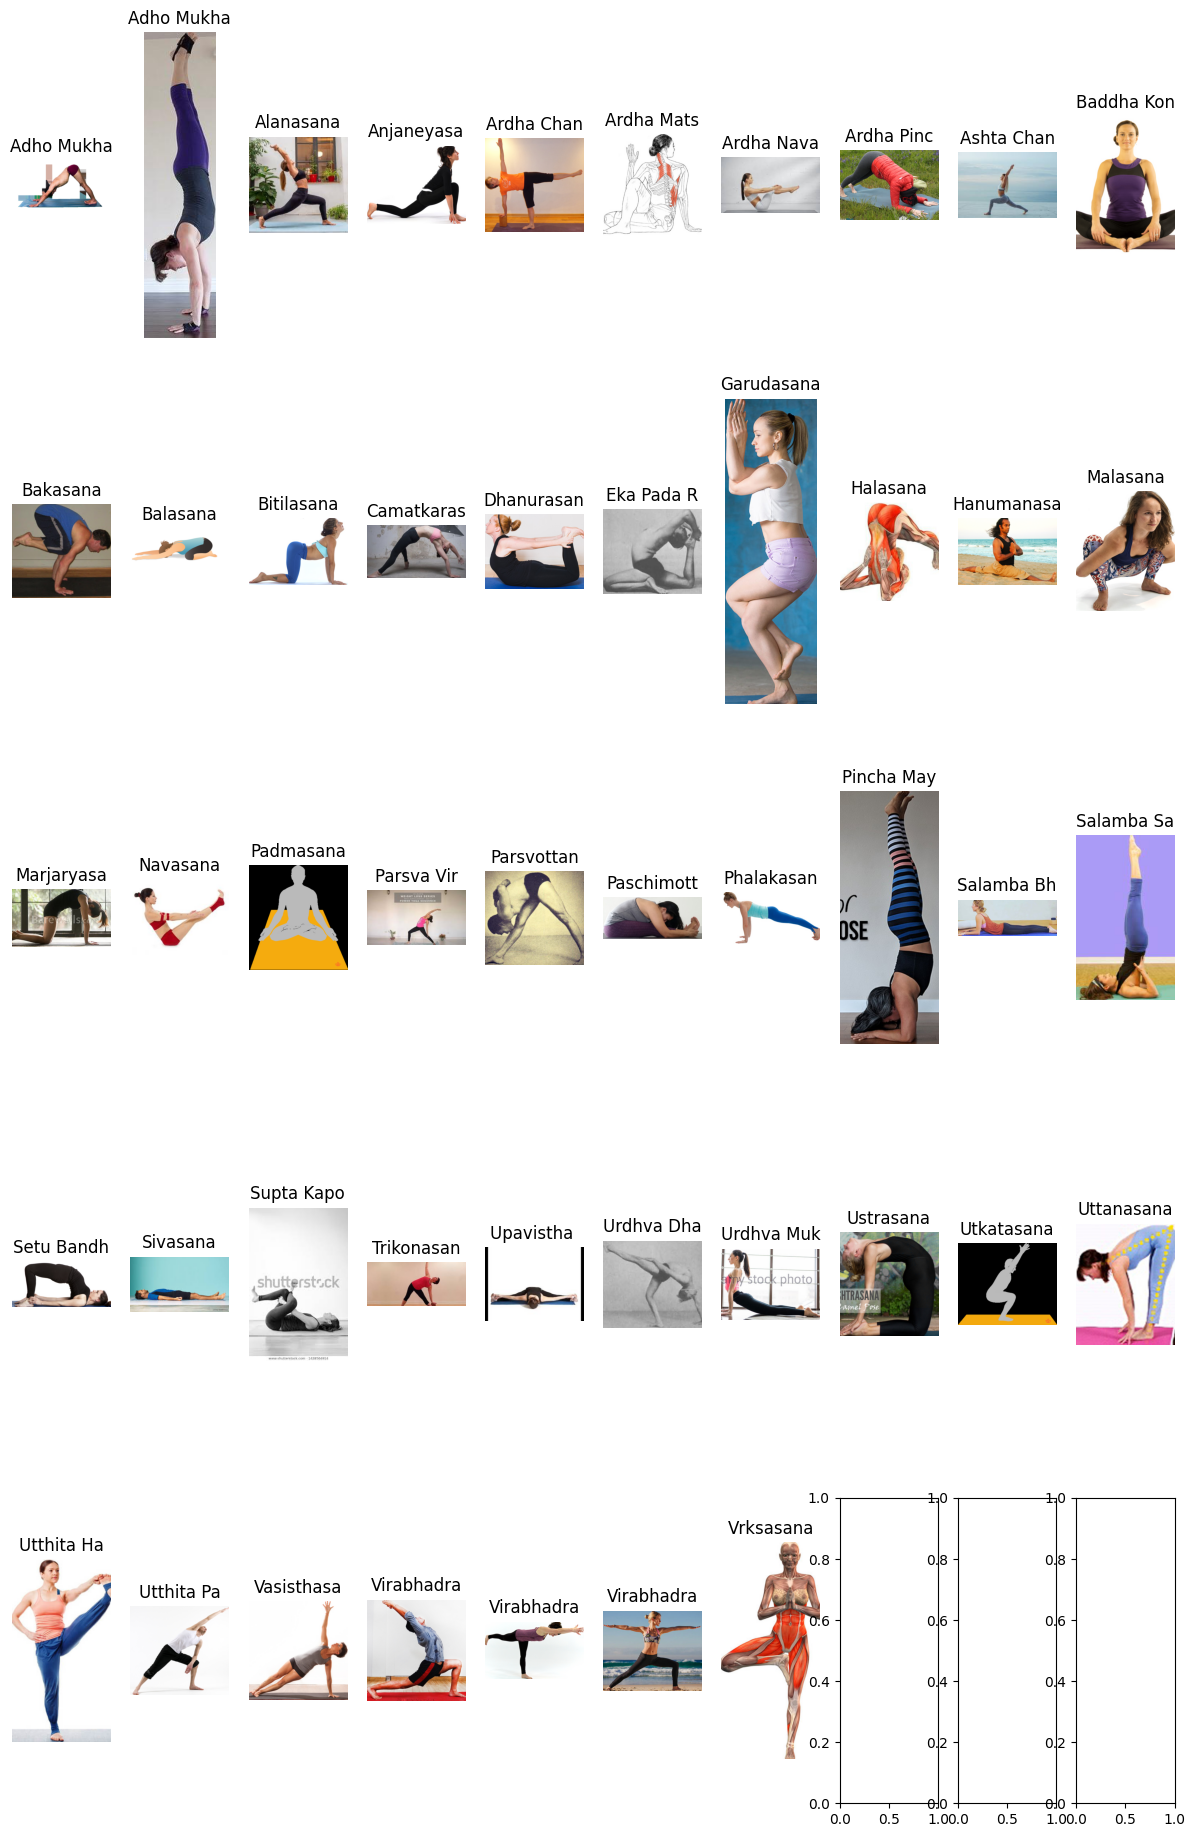

In [7]:
def visualize_samples(dataset_path, classes):
    fig, axes = plt.subplots(len(classes) // 10 + 1, 10, figsize=(15, len(classes) // 2))
    axes = axes.flatten()
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        img_name = os.listdir(class_path)[0]
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(class_name[:10])
    plt.show()

visualize_samples(dataset_path, classes)

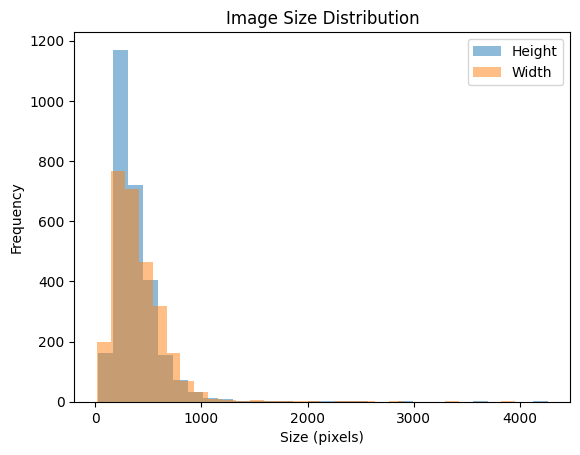

In [8]:
image_sizes = []
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])

image_sizes = np.array(image_sizes)
plt.hist(image_sizes[:, 0], bins=30, alpha=0.5, label='Height')
plt.hist(image_sizes[:, 1], bins=30, alpha=0.5, label='Width')
plt.xlabel('Size (pixels)')
plt.ylabel('Frequency')
plt.title('Image Size Distribution')
plt.legend()
plt.show()


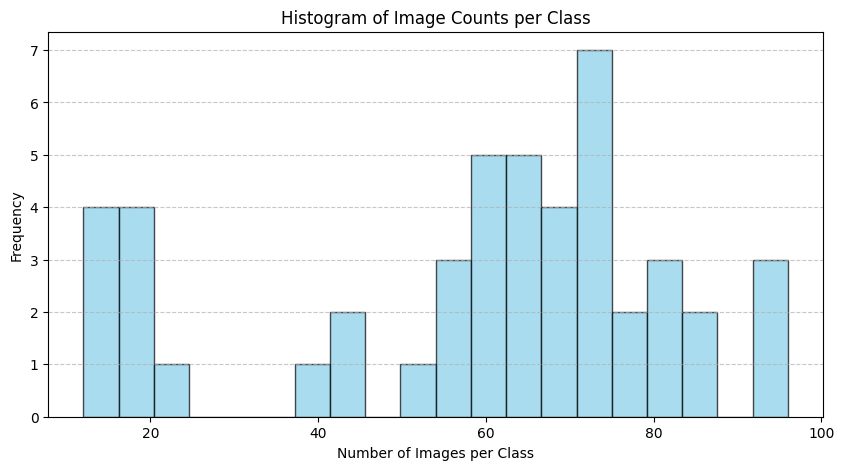

In [9]:
image_counts = []
if os.path.exists(dataset_path):
    for class_name in sorted(os.listdir(dataset_path)):  # Sorting for consistency
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Ensure it's a folder
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))])
            image_counts.append(num_images)
    plt.figure(figsize=(10, 5))
    plt.hist(image_counts, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel("Number of Images per Class")
    plt.ylabel("Frequency")
    plt.title("Histogram of Image Counts per Class")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
else:
    print("Invalid dataset path. Please check and try again.")
